In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!

In [5]:
cad_jpy_df['Return'] = cad_jpy_df.Price.pct_change() * 100
cad_jpy_df['Return'] = cad_jpy_df.Price.replace(-np.inf, np.nan).dropna()
cad_jpy_df

,Price,Open,High,Low,Return
Date,,,,,
1990-01-02,126.37,126.31,126.37,126.31,126.37
1990-01-03,125.30,125.24,125.30,125.24,125.30
1990-01-04,123.46,123.41,123.46,123.41,123.46
1990-01-05,124.54,124.48,124.54,124.48,124.54
1990-01-08,124.27,124.21,124.27,124.21,124.27
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,78.29
2020-06-01,79.27,78.21,79.36,78.04,79.27
2020-06-02,80.40,79.26,80.56,79.15,80.40


### Lagged Returns 

In [6]:
# Create a lagged return using the shift function
# YOUR CODE HERE!

In [7]:
cad_jpy_df['Lagged_Return'] = cad_jpy_df.Return.shift()
cad_jpy_df = cad_jpy_df.dropna()
cad_jpy_df.tail()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,78.29,78.23
2020-06-01,79.27,78.21,79.36,78.04,79.27,78.29
2020-06-02,80.40,79.26,80.56,79.15,80.40,79.27
2020-06-03,80.70,80.40,80.82,79.96,80.70,80.40
2020-06-04,80.71,80.80,80.89,80.51,80.71,80.70


### Train Test Split

In [8]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [9]:
#train = cad_jpy_df['2018':'2019']
#test = cad_jpy_df['2020':]

In [10]:
train

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-03,125.30,125.24,125.30,125.24,125.30,126.37
1990-01-04,123.46,123.41,123.46,123.41,123.46,125.30
1990-01-05,124.54,124.48,124.54,124.48,124.54,123.46
1990-01-08,124.27,124.21,124.27,124.21,124.27,124.54
1990-01-09,125.10,125.04,125.10,125.04,125.10,124.27
...,...,...,...,...,...,...
2017-12-25,88.99,89.03,89.12,88.89,88.99,88.96
2017-12-26,89.23,88.98,89.28,88.94,89.23,88.99
2017-12-27,89.58,89.23,89.75,89.17,89.58,89.23


In [11]:
test

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
2018-01-01,89.80,89.59,89.83,89.56,89.80,89.58
2018-01-02,89.75,89.83,90.00,89.39,89.75,89.80
2018-01-03,89.76,89.76,89.84,89.51,89.76,89.75
2018-01-04,90.30,89.75,90.32,89.69,90.30,89.76
2018-01-05,91.13,90.31,91.61,90.23,91.13,90.30
...,...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,78.29,78.23
2020-06-01,79.27,78.21,79.36,78.04,79.27,78.29
2020-06-02,80.40,79.26,80.56,79.15,80.40,79.27


In [12]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!

In [13]:
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"].to_frame()
y_test = test["Return"].to_frame()

In [14]:
X_train

,Lagged_Return
Date,
1990-01-03,126.37
1990-01-04,125.30
1990-01-05,123.46
1990-01-08,124.54
1990-01-09,124.27
...,...
2017-12-25,88.96
2017-12-26,88.99
2017-12-27,89.23


In [15]:
y_train

,Return
Date,
1990-01-03,125.30
1990-01-04,123.46
1990-01-05,124.54
1990-01-08,124.27
1990-01-09,125.10
...,...
2017-12-25,88.99
2017-12-26,89.23
2017-12-27,89.58


In [16]:
X_test

,Lagged_Return
Date,
2018-01-01,89.58
2018-01-02,89.80
2018-01-03,89.75
2018-01-04,89.76
2018-01-05,90.30
...,...
2020-05-29,78.23
2020-06-01,78.29
2020-06-02,79.27


In [17]:
y_test

,Return
Date,
2018-01-01,89.80
2018-01-02,89.75
2018-01-03,89.76
2018-01-04,90.30
2018-01-05,91.13
...,...
2020-05-29,78.29
2020-06-01,79.27
2020-06-02,80.40


In [18]:
# Preview the X_train data
# YOUR CODE HERE!

# Linear Regression Model

In [19]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [20]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!

In [21]:
predictions = model.predict(X_test)

In [22]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!

In [23]:
Results = y_test
Results["Predicted Return"] = predictions

In [24]:
Results.head(2)

,Return,Predicted Return
Date,,
2018-01-01,89.80,89.573601
2018-01-02,89.75,89.793175


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

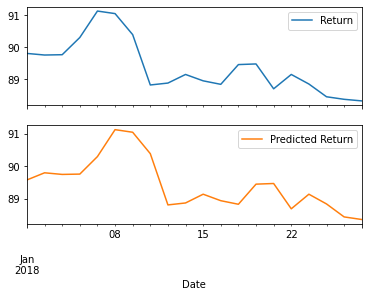

In [25]:
Results[:20].plot(subplots=True)

<AxesSubplot:xlabel='Date'>

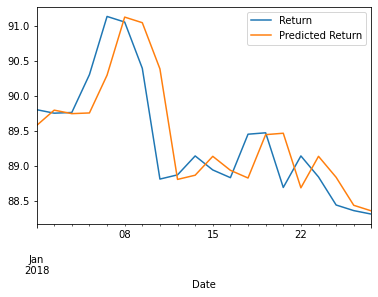

In [26]:
Results[:20].plot()

In [27]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [28]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.5239201543328776


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [29]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.7443748215901765


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE